# Data preparation

In [39]:
import pandas as pd

In [40]:
data_file = "D:\studia\PRO\inzynierka\dane.data"
data = pd.read_csv(data_file, sep='\t', header=0, low_memory=False)
data.head()

PhraseId  SentenceId  \
0         1           1   
1         2           1   
2         3           1   
3         4           1   
4         5           1   

                                                                                                                                                                                         Phrase  \
0  A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .   
1                                                                                                                 A series of escapades demonstrating the adage that what is good for the goose   
2                                                                                                                                                                                      A series   
3                                                                                                                                                                                             A   
4                                                                                                                                                                                        series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2

In [41]:
phrases = data.iloc[0:, -2]
phrases.head()

0    A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
1                                                                                                                   A series of escapades demonstrating the adage that what is good for the goose
2                                                                                                                                                                                        A series
3                                                                                                                                                                                               A
4                                                                                                                                                                                          series
Name: Phrase, dtype: object

In [42]:
labels = data.iloc[0:, -1]
labels.head()

0    1
1    2
2    2
3    2
4    2
Name: Sentiment, dtype: int64

##  Vectorization

### Tokenization

In [43]:
import re

def custom_tokenizer(phrase):
    clean_phrase = phrase.lower()
    clean_phrase = re.sub("[^a-z]", " ", clean_phrase)
    
    for _ in ['not', 'no']:
        pattern = "(^|\s+)" + _ + "\s+"
        clean_phrase = re.sub(pattern, " " + _, clean_phrase)
        
    for _ in ['don t', 'doesn t', 'won t', 'wouldn t', 'haven t', 'hasn t', 'couldn t', 'can t', 'must n']:
        pattern = "(^|\s)+" + _ + "\s+"
        clean_phrase = re.sub(pattern, " not", clean_phrase)
                                   
    clean_phrase = re.sub("(^|\s+)[a-z]\s+", " ", clean_phrase)
    
    for _ in ['the', 'an', 'of', 'with']:
        pattern = "(^|\s+)" + _ + "\s+"
        clean_phrase = re.sub(pattern, " ", clean_phrase)
    
    return clean_phrase.split()

### Term Frequency-Inverse Document Frequency

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, analyzer='word')

In [45]:
vectorized_phrases_tfid = tfidf_vectorizer.fit_transform(phrases)

### Simple count

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorize = CountVectorizer(tokenizer=custom_tokenizer, analyzer='word') 
vectorized_phrases_count = count_vectorize.fit_transform(phrases)

## Train-test split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
train_data_tfidf, test_data_tfidf, train_label, test_label = train_test_split(vectorized_phrases_tfid, labels, test_size=0.2, random_state=1)

In [49]:
train_data_count, test_data_count, train_label, test_label = train_test_split(vectorized_phrases_count, labels, test_size=0.2, random_state=1)

# Useful functions

In [50]:
from sklearn import metrics
from seaborn import heatmap
import matplotlib.pyplot as plt


def plot_heatmap(matrix, accuracy, labels, title):
    heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Accuracy: {:0.2f}%".format(accuracy * 100))
    plt.suptitle(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    
def plot(predictions, title):
    label_set = set(test_label)
    matrix = metrics.confusion_matrix(test_label, predictions, labels=list(label_set))
    accuracy = metrics.accuracy_score(test_label, predictions)
    plot_heatmap(matrix, accuracy, label_set, title)

# Naive Bayes

In [51]:
from sklearn.naive_bayes import MultinomialNB
classifier_tfidf = MultinomialNB()
classifier_count = MultinomialNB()

In [52]:
classifier_tfidf.fit(train_data_tfidf,train_label)

MultinomialNB()

In [53]:
classifier_count.fit(train_data_count,train_label)

MultinomialNB()

In [54]:
predictions_nb_tfidf = classifier_tfidf.predict(test_data_tfidf)

In [55]:
predictions_nb_count = classifier_tfidf.predict(test_data_count)

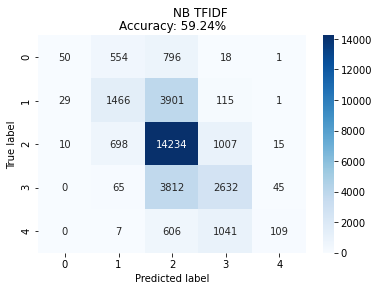

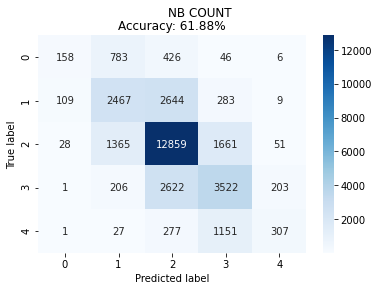

In [56]:
plot(predictions_nb_tfidf, "NB TFIDF")
plot(predictions_nb_count, "NB COUNT")

# Support Vector Machine

In [57]:
from sklearn.svm import LinearSVC
svc_classifier_tfidf = LinearSVC(max_iter=5000)
svc_classifier_count = LinearSVC(max_iter=5000)

In [58]:
svc_classifier_tfidf.fit(train_data_tfidf, train_label)

LinearSVC(max_iter=5000)

In [ ]:
svc_classifier_count.fit(train_data_count, train_label)

In [ ]:
predictions_svc_tfidf  = svc_classifier_tfidf.predict(test_data_tfidf)

In [ ]:
predictions_svc_count  = svc_classifier_tfidf.predict(test_data_count)

In [ ]:
plot(predictions_svc_tfidf, "SVC TFIDF")
plot(predictions_svc_count, "SVC COUNT")


# Results

In [ ]:
results = pd.DataFrame(phrases.iloc[test_label.index])

In [ ]:
results['Tokenized'] = results["Phrase"].apply(custom_tokenizer)
results['Sentiment'] = test_label
results['NB TFIDF'] = predictions_nb_tfidf
results['SVM TFIDF'] = predictions_svc_tfidf
results['NB COUNT'] = predictions_nb_count
results['SVM COUNT'] = predictions_svc_count

In [ ]:
results

###  TFID

#### Correct NB prediction, incorrect SVM prediction

In [ ]:
selected_rows = results.loc[(results['NB TFIDF'] == results['Sentiment']) &(results['SVM TFIDF'] != results['Sentiment'])]
selected_rows.iloc[0:, 0:5]

#### Correct SVM prediction, incorrect NB prediction

In [ ]:
selected_rows = results.loc[(results['NB TFIDF'] != results['Sentiment']) &(results['SVM TFIDF'] == results['Sentiment'])]
selected_rows.iloc[0:, 0:5]

#### Worst predictions

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
selected_rows = results.loc[((results['Sentiment'] == 4) & ((results['SVM TFIDF'] == 0) | (results['SVM TFIDF'] == 1) | (results['NB TFIDF'] == 0) | (results['NB TFIDF'] == 1))) | ((results['Sentiment'] == 0) & ((results['SVM TFIDF'] == 4) | (results['SVM TFIDF'] == 3) | (results['NB TFIDF'] == 4) | (results['NB TFIDF'] == 3)))]
selected_rows.iloc[0:, 0:5]

In [ ]:
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_rows', 60)

### Count

#### Correct NB prediction, incorrect SVM prediction

In [ ]:
selected_rows = results.loc[(results['NB COUNT'] == results['Sentiment']) &(results['SVM COUNT'] != results['Sentiment'])]
selected_rows.iloc[0:, [0,1,2,5,6]]

#### Correct SVM prediction, incorrect NB prediction

In [ ]:
selected_rows = results.loc[(results['NB COUNT'] != results['Sentiment']) &(results['SVM COUNT'] == results['Sentiment'])]
selected_rows.iloc[0:, [0,1,2,5,6]]

#### Worst predictions

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
selected_rows = results.loc[((results['Sentiment'] == 4) & ((results['SVM COUNT'] == 0) | (results['SVM COUNT'] == 1) | (results['NB COUNT'] == 0) | (results['NB COUNT'] == 1))) | ((results['Sentiment'] == 0) & ((results['SVM COUNT'] == 4) | (results['SVM COUNT'] == 3) | (results['NB COUNT'] == 4) | (results['NB COUNT'] == 3)))]
selected_rows.iloc[0:, [0,1,2,5,6]]

## Results without the strength of sentiment

In [ ]:
import numpy as np
ignore_strength = np.vectorize({0: 'negative', 1:'negative', 2:'neutral', 3:'positive', 4:'positive'}.get)

In [ ]:
def plot_without_strength(predictions, title):
    labels = ['negative', 'neutral', 'positive']
    labels_without_strength = ignore_strength(test_label)
    predictions_without_strength = ignore_strength(predictions)
    matrix = metrics.confusion_matrix(labels_without_strength,predictions_without_strength, labels=labels)
    accuracy = metrics.accuracy_score(labels_without_strength,predictions_without_strength)
    plot_heatmap(matrix, accuracy, labels, title)
    

### Naive Bayes

In [ ]:
plot_without_strength(predictions_nb_tfidf, "NB TFIDF")
plot_without_strength(predictions_nb_count, "NB COUNT")

### Support Vector Machine

In [ ]:
plot_without_strength(predictions_svc_tfidf, "SVC TFIDF")
plot_without_strength(predictions_svc_count, "SVC COUNT")